# Rotten Tomatoes

In this project, you are given large datasets from Rotten Tomatoes - a popular online review aggregator for film and television. Your task is to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

https://platform.stratascratch.com/data-projects/rotten-tomatoes-movies-rating-prediction

> TASK: Your task is to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

## DATA LOAD

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    pair_confusion_matrix,
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


In [3]:
# load data
dfm = pd.read_csv("./datasets/rotten_tomatoes_movies.csv")  # movies

# critic reviews
dfc = pd.read_csv("./datasets/rotten_tomatoes_critic_reviews_50k.csv")


In [4]:
dfm.head(2)


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [5]:
dfc.head(2)


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."


## EDA (First Approach: Predicting Movie Status Based on Numerical and Categorical Features)

### data quick peek

In [6]:
# find description about the movies data
dfm.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [7]:
# describe data
dfm.describe()


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


In [8]:
# data info about features
dfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

### deep dive into some features

In [9]:
list(dfm.columns.values)


['rotten_tomatoes_link',
 'movie_title',
 'movie_info',
 'critics_consensus',
 'content_rating',
 'genres',
 'directors',
 'authors',
 'actors',
 'original_release_date',
 'streaming_release_date',
 'runtime',
 'production_company',
 'tomatometer_status',
 'tomatometer_rating',
 'tomatometer_count',
 'audience_status',
 'audience_rating',
 'audience_count',
 'tomatometer_top_critics_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rotten_critics_count']

In [10]:
# check the list of columns
dfm.columns


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count'],
      dtype='object')

In [11]:
# get the count of all genres
dfm["genres"]


0        Action & Adventure, Comedy, Drama, Science Fic...
1                                                   Comedy
2                                          Comedy, Romance
3                                          Classics, Drama
4                 Action & Adventure, Drama, Kids & Family
                               ...                        
17707                     Drama, Musical & Performing Arts
17708                Action & Adventure, Animation, Comedy
17709    Action & Adventure, Art House & International,...
17710                                      Classics, Drama
17711    Action & Adventure, Art House & International,...
Name: genres, Length: 17712, dtype: object

### preprocess data


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

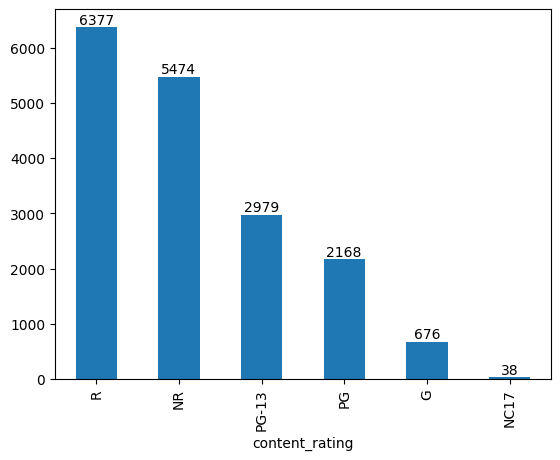

In [12]:
ax = (
    dfm["content_rating"]
    .value_counts()
    .plot(
        kind="bar",
    )
)
ax.bar_label(ax.containers[0])


In [13]:
# one hot encoding content_rating
content_rating = pd.get_dummies(dfm["content_rating"]).astype(int)
content_rating.head()


,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


[Text(0, 0, '9390'), Text(0, 0, '7874')]

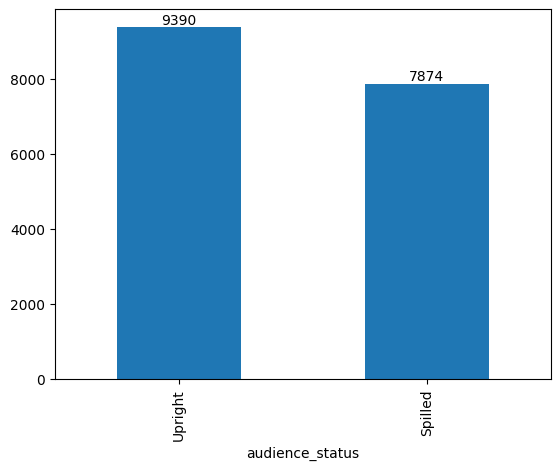

In [14]:
# show the audience status value counts
ax = dfm["audience_status"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])


In [15]:
# encode the audience status feature w/ ordinal encoding
audience_status = pd.DataFrame(
    dfm["audience_status"].replace(["Spilled", "Upright"], [0, 1])
)
audience_status.head()


,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


In [16]:
# ordinal encoding of tomato meter feature
tomatometer_status = pd.DataFrame(
    dfm["tomatometer_status"].replace(["Rotten", "Fresh", "Certified-Fresh"], [0, 1, 2])
)
tomatometer_status.head()


,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


In [17]:
#
sorted(dfm.columns)


['actors',
 'audience_count',
 'audience_rating',
 'audience_status',
 'authors',
 'content_rating',
 'critics_consensus',
 'directors',
 'genres',
 'movie_info',
 'movie_title',
 'original_release_date',
 'production_company',
 'rotten_tomatoes_link',
 'runtime',
 'streaming_release_date',
 'tomatometer_count',
 'tomatometer_fresh_critics_count',
 'tomatometer_rating',
 'tomatometer_rotten_critics_count',
 'tomatometer_status',
 'tomatometer_top_critics_count']

In [18]:
# combine all of the preprocessed features
df_feature = pd.concat(
    [
        dfm[
            [
                "runtime",
                "tomatometer_rating",
                "tomatometer_count",
                "audience_rating",
                "audience_count",
                "tomatometer_top_critics_count",
                "tomatometer_fresh_critics_count",
                "tomatometer_rotten_critics_count",
            ]
        ],
        content_rating,
        audience_status,
        tomatometer_status,
    ],
    axis=1,
).dropna()

df_feature.head()


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,0,0,1,0,0,0,1.0,2.0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1,0,0,0,0,0,1.0,1.0


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

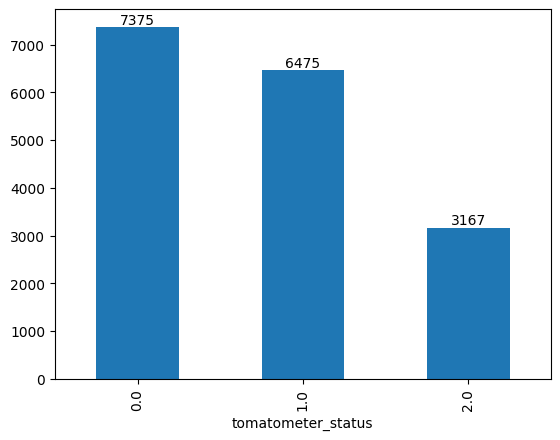

In [19]:
# check the class distribution of target variable
ax = df_feature["tomatometer_status"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])


### prepare data for train, test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.drop(["tomatometer_status"], axis=1),
    df_feature["tomatometer_status"],
    test_size=0.2,
    random_state=42,
)

print(
    f"size of training data: {len(X_train)}\n\
the size of testing data: {len(X_test)}"
)


size of training data: 13613
the size of testing data: 3404


## MODEL

### Decision Tree classifier - constrained

In [21]:
# initiate model
model = DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)
model


DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [22]:
# train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(max_leaf_nodes=3, random_state=2)

In [23]:
# predict from the model
y_predict = model.predict(X_test)


In [24]:
# print the results
print(accuracy_score(y_test, y_pred=y_predict))


0.9462397179788484


In [25]:
# print classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



In [26]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm


array([[1488,    0,    0],
       [   0, 1133,  153],
       [   0,   30,  600]])

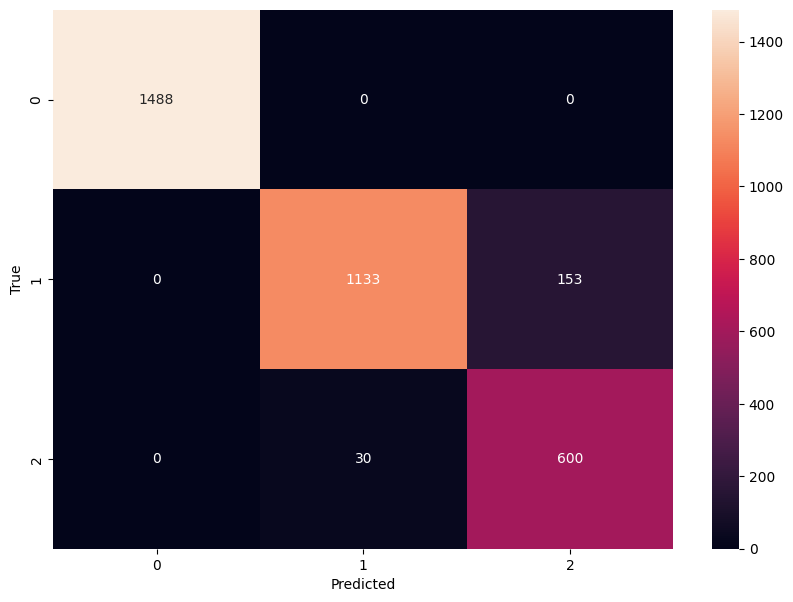

In [27]:
import seaborn as sns

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


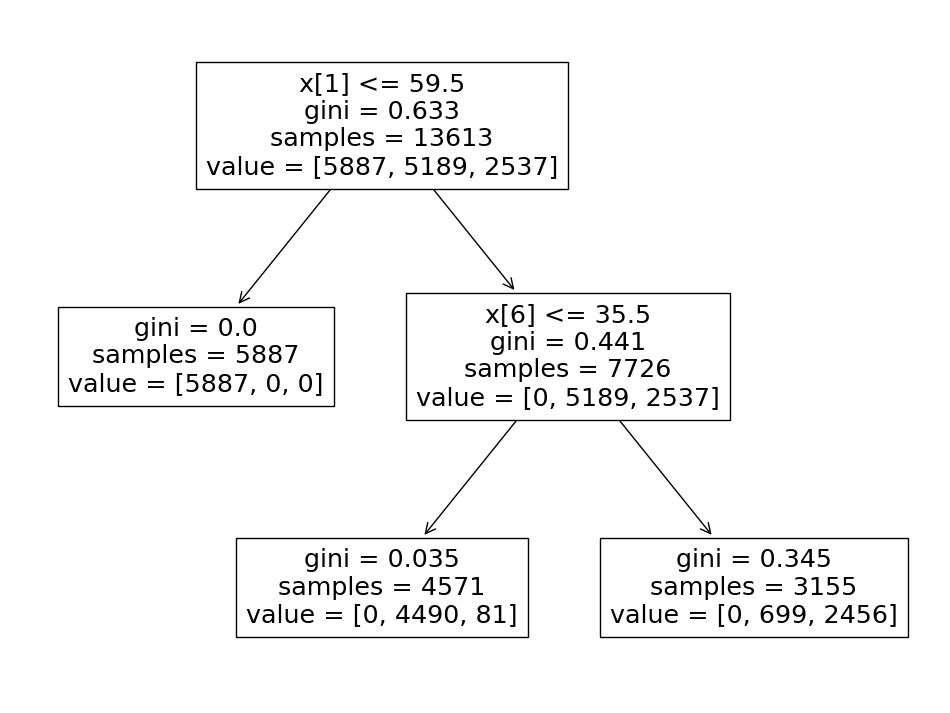

In [28]:
# visualize the decision logic
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(model, ax=ax)
plt.show()


### Decision Tree: unconstrained

In [29]:
# initiate model with default settings
model = DecisionTreeClassifier(random_state=2)


In [30]:
# train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=2)

In [31]:
# predict
y_predict = model.predict(X_test)

# print the results
print(accuracy_score(y_test, y_pred=y_predict))


0.9900117508813161


In [32]:
# print the classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.97      0.97       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



In [33]:
# get the confusion matrix
cm = confusion_matrix(y_test, y_predict)
cm


array([[1488,    0,    0],
       [   0, 1269,   17],
       [   0,   17,  613]])

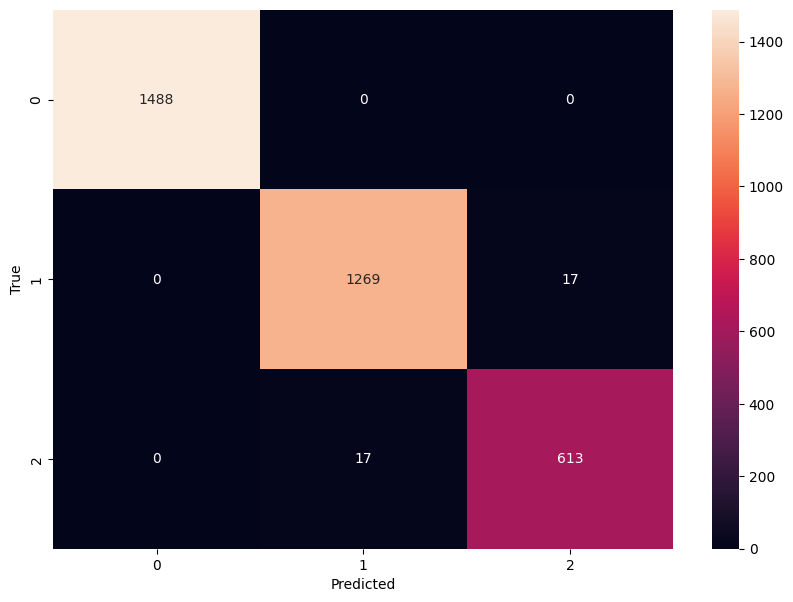

In [34]:
import seaborn as sns

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Random Forest Classifier

A random forest classifier

A random forest classifier is a machine learning algorithm that combines multiple decision trees to improve the accuracy of predictions. It is called a "random forest" because each decision tree in the ensemble is built on a random subset of the training data and a random subset of features.

The random forest classifier works by creating a large number of decision trees and then aggregating their predictions to make the final prediction. Each tree is independently trained on a different subset of the data and features, which helps to reduce the impact of individual trees overfitting the training data.

During prediction, the random forest classifier takes a majority vote from all the decision trees to make the final prediction. This ensemble approach helps to minimize bias and variance, leading to improved accuracy and generalization.

Random forests are widely used in various applications, including image classification, natural language processing, and finance. They are known for their robustness, scalability, and ability to handle large datasets with high dimensions.


In [35]:
# instantiate a model
rf_model = RandomForestClassifier(random_state=2)


In [36]:
# train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

In [37]:
y_predict = rf_model.predict(X_test)


In [38]:
print(accuracy_score(y_test, y_predict))


0.9908930669800236


In [39]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



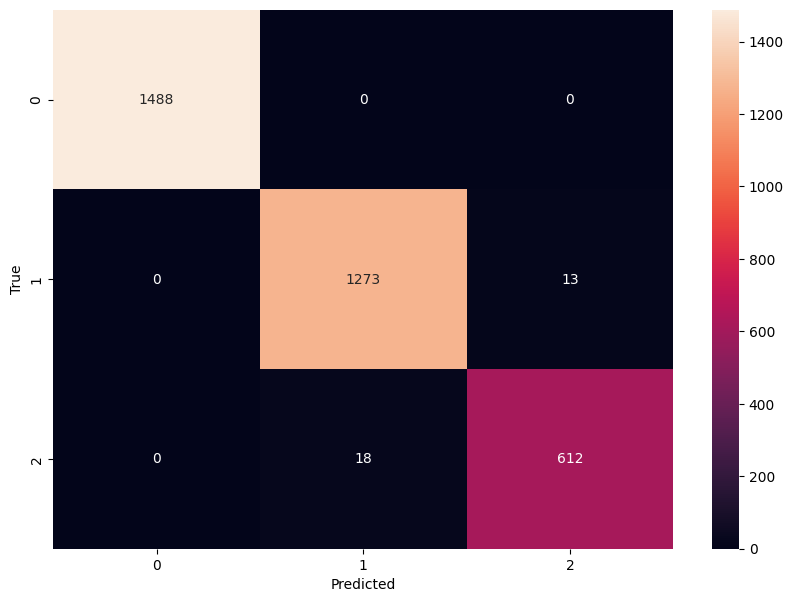

In [40]:
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)


# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [41]:
# get the feature importance
feature_importance = rf_model.feature_importances_

# print feature importance
for idx, feature in enumerate(X_train.columns):
    print(f"{feature} = {round(feature_importance[idx], 3)}")


runtime = 0.006
tomatometer_rating = 0.475
tomatometer_count = 0.099
audience_rating = 0.054
audience_count = 0.016
tomatometer_top_critics_count = 0.036
tomatometer_fresh_critics_count = 0.142
tomatometer_rotten_critics_count = 0.131
G = 0.0
NC17 = 0.0
NR = 0.009
PG = 0.001
PG-13 = 0.003
R = 0.002
audience_status = 0.026


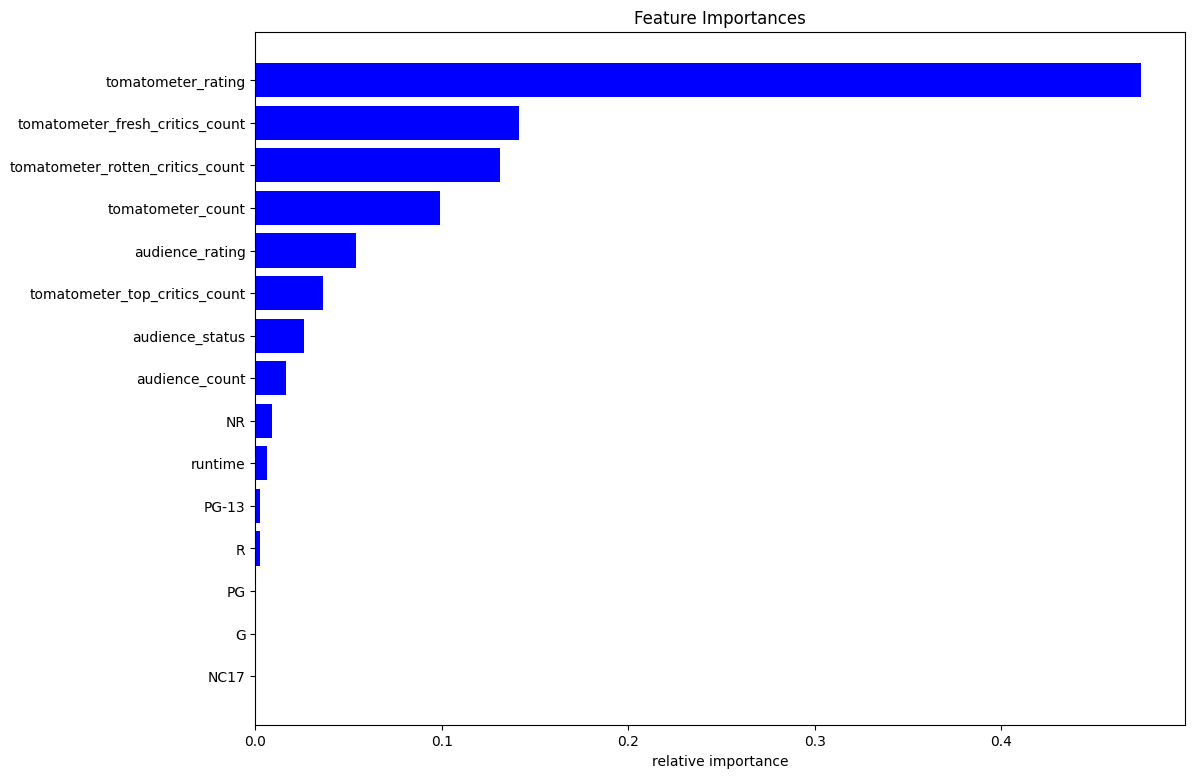

In [42]:
# visualize feature from the most important to the least important
indices = np.argsort(feature_importance)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importance[indices], color="b", align="center")
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel("relative importance")
plt.show()


### Random Forest w/ Feature Selection

In [43]:
# Split data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(
    df_feature.drop(
        ["tomatometer_status", "NR", "runtime", "PG-13", "R", "PG", "G", "NC17"], axis=1
    ),
    df_feature.tomatometer_status,
    test_size=0.2,
    random_state=42,
)
print(
    f"Size of training data is {len(X_train)} and the size of test data is {len(X_test)}"
)


Size of training data is 13613 and the size of test data is 3404


In [44]:
# initialize random forest classifier
model_rfc = RandomForestClassifier(random_state=2)


In [45]:
# tran
model_rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

In [46]:
y_predict = model_rfc.predict(X_test)


In [47]:
print(accuracy_score(y_test, y_predict))


0.9917743830787309


In [48]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



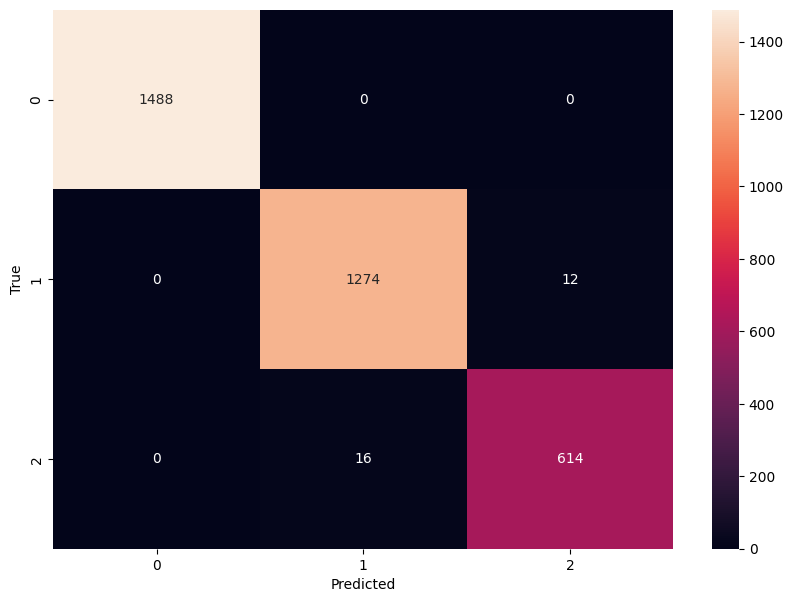

In [49]:
cm = confusion_matrix(y_test, y_predict)
cm

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Random Forest Classifier w/ Feature Selection & Weighted

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

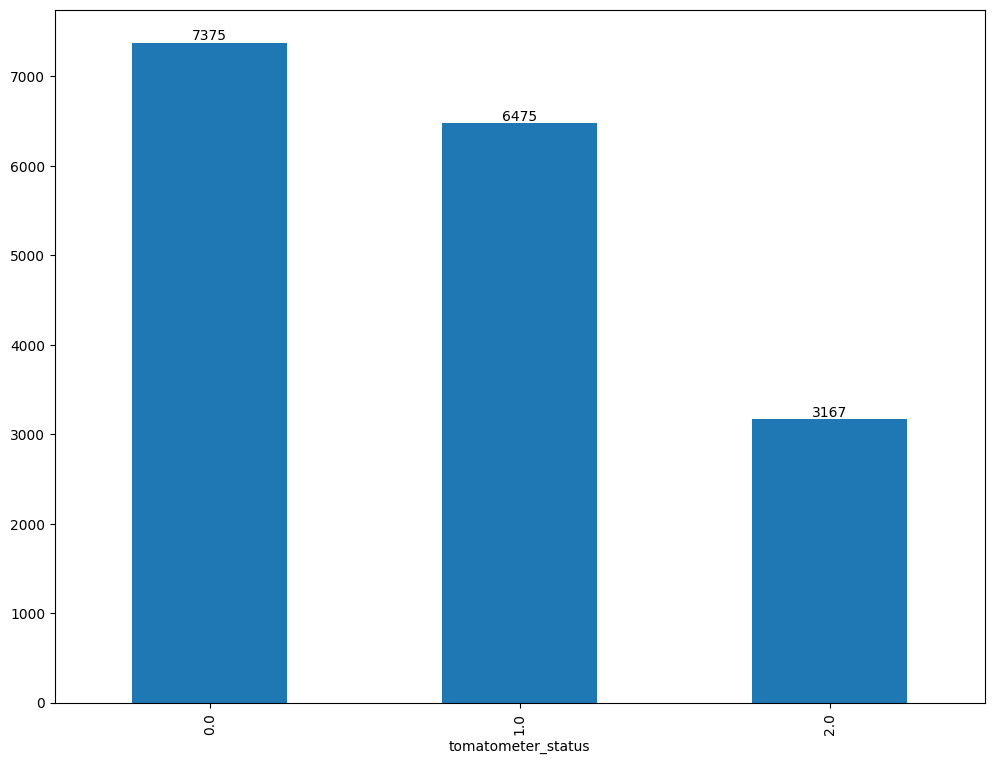

In [50]:
# check class distribution of target variable
ax = df_feature["tomatometer_status"].value_counts().plot(kind="bar", figsize=(12, 9))

ax.bar_label(ax.containers[0])


In [51]:
# compute class weight
class_weight = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(df_feature["tomatometer_status"]),
    y=df_feature["tomatometer_status"].values,
)

class_weight_dict = dict(zip(range(len(class_weight.tolist())), class_weight.tolist()))

class_weight_dict


{0: 0.7691299435028248, 1: 0.8760360360360361, 2: 1.7910746237238186}

In [52]:
# initiate weighted model
model_rfw = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)


In [53]:
# train model
model_rfw.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 0.7691299435028248,
                                     1: 0.8760360360360361,
                                     2: 1.7910746237238186},
                       random_state=2)

In [54]:
# predict model
y_predict = model_rfw.predict(X_test)


In [55]:
accuracy_score(y_test, y_predict)


0.9926556991774383

In [56]:
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



## EDA (Second Approach: Predicting Movie Status Based on Review Sentiment)

In [57]:
# read critics df
dfc.head()


,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [58]:
# merge both critics and movie status dataframes
df = dfc.merge(dfm, how="inner", on=["rotten_tomatoes_link"])
df = df[
    [
        "rotten_tomatoes_link",
        "movie_title",
        "review_content",
        "review_type",
        "tomatometer_status",
    ]
]

df.head()


,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,Rotten
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,Rotten
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,Rotten
3,m/0814255,Percy Jackson & the Olympians: The Lightning T...,Whether audiences will get behind The Lightnin...,Fresh,Rotten
4,m/0814255,Percy Jackson & the Olympians: The Lightning T...,What's really lacking in The Lightning Thief i...,Rotten,Rotten


In [59]:
# drop entries w/ missing reviews
df = df.dropna(subset=["review_content"])


[Text(0, 0, '25276'), Text(0, 0, '15919')]

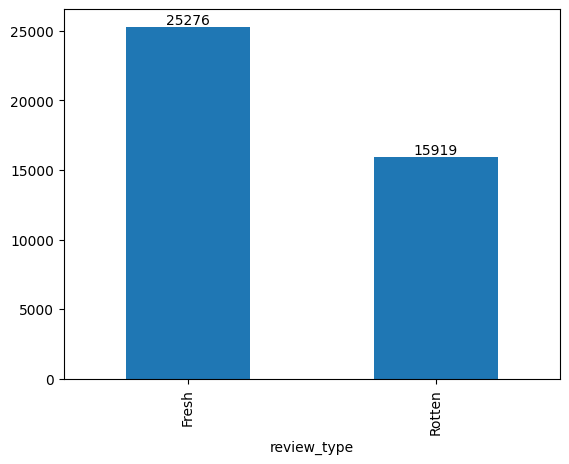

In [60]:
# plot the distribution
ax = df["review_type"].value_counts().plot(kind="bar")
ax.bar_label(ax.containers[0])


In [61]:
# pick only 5000 entries from the original dataset
df_sub = df[:5000]
df_sub.count()


rotten_tomatoes_link    5000
movie_title             5000
review_content          5000
review_type             5000
tomatometer_status      5000
dtype: int64

In [62]:
# encode the target label
review_type = pd.DataFrame(df_sub["review_type"].replace(["Rotten", "Fresh"], [0, 1]))

review_type


,review_type
0,1
1,1
2,1
3,1
4,0
...,...
5290,0
5291,1
5292,1
5293,1


In [63]:
# build a final dataframe
df_feature_critics = pd.concat(
    [df_sub[["review_content"]], review_type], axis=1
).dropna()

df_feature_critics.head()


,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


## MODEL

### Default Random Forest

In [65]:
# instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)


In [68]:
# transform text data into vectors
X_train_vector = vectorizer.fit_transform(X_train).toarray()


In [69]:
# initialize model & train
rfd = RandomForestClassifier(random_state=2)
rfd.fit(X_train, y_train)


RandomForestClassifier(random_state=2)

In [70]:
# predict
y_predict = rfd.predict(X_test)


In [71]:
# accuracy score
accuracy_score(y_test, y_predict)


0.9917743830787309

In [73]:
# classification report
print(classification_report(y_test, y_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



In [77]:
cm = confusion_matrix(y_test, y_predict)
cm


array([[1488,    0,    0],
       [   0, 1274,   12],
       [   0,   16,  614]])

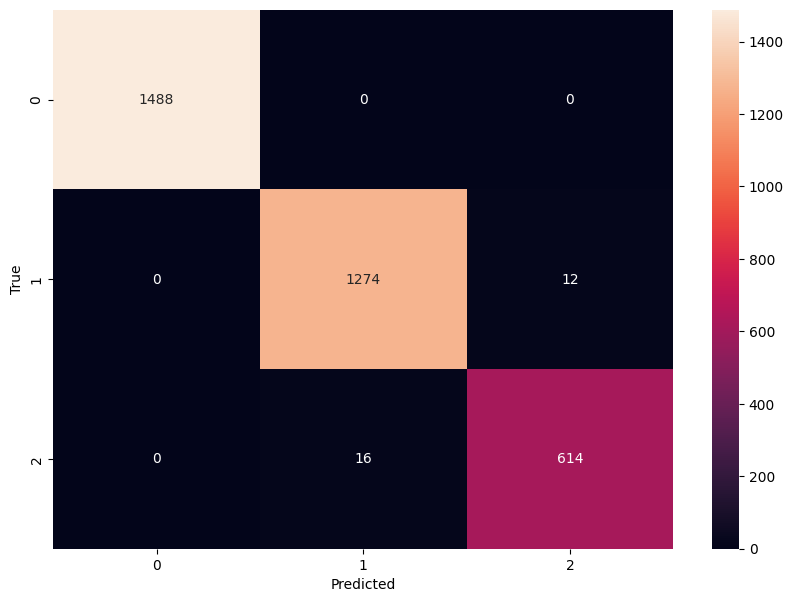

In [84]:
import seaborn as sns

# plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## PREDICTION

In [85]:
# Define a function to predict movie status based on overall sentiment


def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum() / len(prediction) * 100

    prediction = "Fresh" if positive_percentage >= 60 else "Rotten"

    print(f"Positive review:{positive_percentage:.2f}%")
    print(f"Movie status: {prediction}")


In [94]:
# get movie reviews for Body of Lies
mask1 = df["movie_title"] == "Body of Lies"
df_bol = df[mask1]
df_bol.head()


,rotten_tomatoes_link,movie_title,review_content,review_type,tomatometer_status
7382,m/10009225-body_of_lies,Body of Lies,DiCaprio (not Crowe) is in top form in Scott's...,Fresh,Rotten
7383,m/10009225-body_of_lies,Body of Lies,Neither the location-based verisimilitude of R...,Rotten,Rotten
7384,m/10009225-body_of_lies,Body of Lies,"DiCaprio gives the role plenty of brio, while ...",Fresh,Rotten
7385,m/10009225-body_of_lies,Body of Lies,"Convincing and gripping, Body of Lies is at th...",Fresh,Rotten
7386,m/10009225-body_of_lies,Body of Lies,Lies and consequences form the heart of this b...,Fresh,Rotten


In [95]:
# get the prediction
y_predicted_bol = model_rfw.predict(
    vectorizer.transform(df_bol["review_content"]).toarray()
)
y_predicted_bol


/Users/vamsi_mbmax/Library/CloudStorage/OneDrive-Personal/01_vam_PROJECTS/LEARNING/proj_ML/dev_proj_ML/strata-rotten-tomatoes-classification/venv/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [93]:
predict_movie_status(y_predicted_bol)


Positive review:0.00%
Movie status: Rotten


## DEPLOYMENT